## Основные концепции нейронных сетей

__Содержание__

1. Введение в нейронные сети
2. Многослойный перцептрон (MLP)
   - Архитектура MLP
   - Типы слоёв
   - Активационные функции
3. Создание простой модели MLP на PyTorch
   - Установка и импорт необходимых библиотек
   - Определение архитектуры модели
   - Обучение модели
   - Оценка результатов
4. Заключение

---

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# pip install scikit-learn
from sklearn.model_selection import train_test_split

import numpy as np


## Введение в нейронные сети

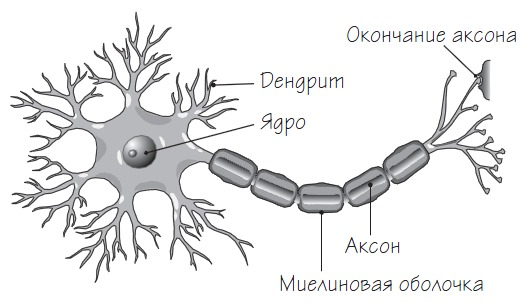

Нейронные сети представляют собой математические модели, вдохновленные биологическими нервными системами. 

Они состоят из взаимосвязанных узлов, называемых нейронами, которые обрабатывают информацию путем передачи сигналов друг другу.



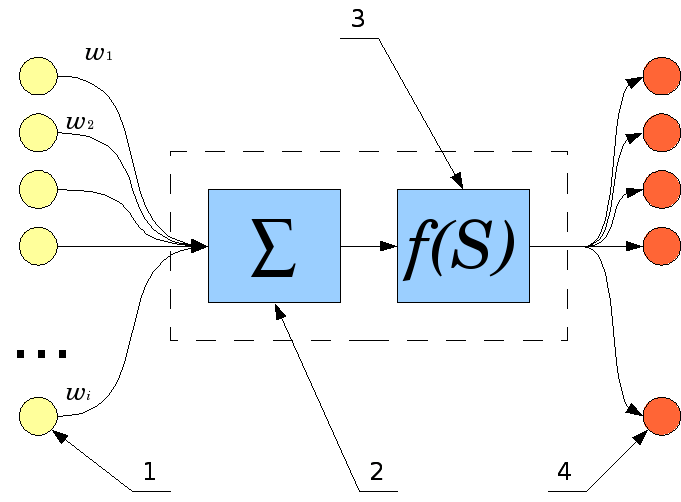

1. Входной сигнал нейрона (или выходной сигнал других нейронов)
2. Сумматор
3. Функция активации
4. Другие нейроны или выходы из сети 

### Основные компоненты нейронной сети:



- **Нейроны**: Основные вычислительные единицы сети.
- **Слои**: Группы нейронов, организованные последовательно.
- **Веса и смещения**: Параметры, настраиваемые в процессе обучения.
- **Активационные функции**: Функции, применяемые к выходам нейронов для введения нелинейности.

#### Нейрон

**Формально**, выход нейрона можно описать как:

$$
y = \phi\left( \sum_{i=1}^{n} w_i x_i + b \right)
$$

где:
- $ x_i $ — входные данные,
- $ w_i $ — веса,
- $ b $ — смещение,
- $ \phi $ — активационная функция.

#### Активационные функции

Активационные функции вводят нелинейность в модель, позволяя сети обучать сложные функции.

- **ReLU (Rectified Linear Unit, Линейный выпрямитель)**:
  
  $$
  \text{ReLU}(x) = \max(0, x)
  $$
  
  Простая и эффективная функция, часто используемая в скрытых слоях.

- **Sigmoid (Логистическая)**:
  
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$
  
  Выводит значения в диапазоне (0, 1), полезна для бинарной классификации.

- **Softmax**:
  
  $$
  \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}}
  $$
  
  Преобразует вектор значений в вероятностное распределение, часто используется в выходном слое для многоклассовой классификации.


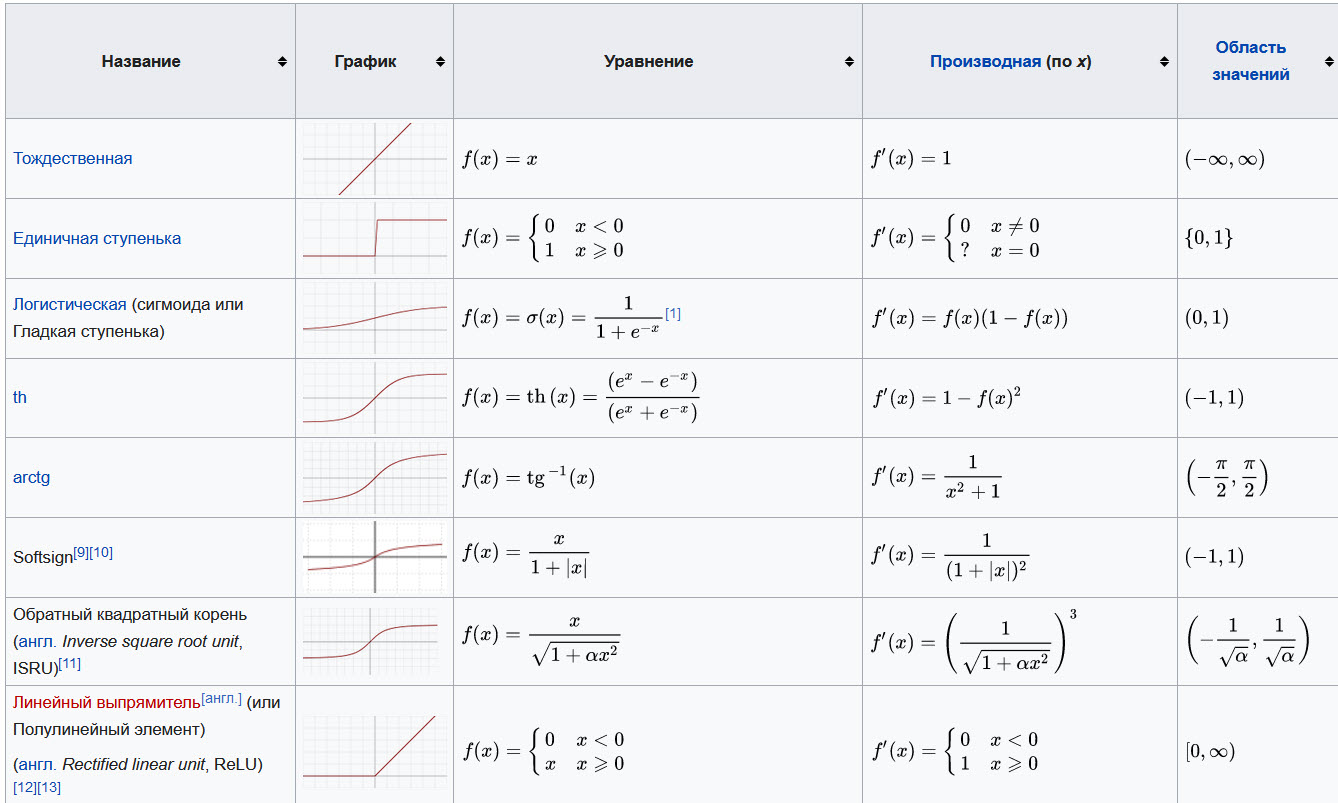

#### Пример с одним нейроном в Pytorch

##### Подготовка данных

In [3]:
# Синтезирование данных
X_plus = torch.rand([500, 2], dtype=torch.float32)
X_minus = torch.rand([500, 2], dtype=torch.float32) * -1.0
X = torch.cat([X_plus, X_minus], dim=0)
print("X shape: ", X.shape)

y_plus = torch.ones([500, 1], dtype=torch.float32)
y_minus = torch.ones([500, 1], dtype=torch.float32) * -1.0
y = torch.cat([y_plus, y_minus], dim=0)
print("y shape: ", y.shape)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X shape:  torch.Size([1000, 2])
y shape:  torch.Size([1000, 1])


In [10]:
# Если не нужен sklearn
 
dataset = torch.utils.data.TensorDataset(X, y)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [800, 200])

                      # генераторы списков
X_train = torch.stack([ x for x, _ in train_dataset])
y_train = torch.stack([ y for _, y in train_dataset])

X_test = torch.stack([ x for x, _ in test_dataset])
y_test = torch.stack([ y for _, y in test_dataset])

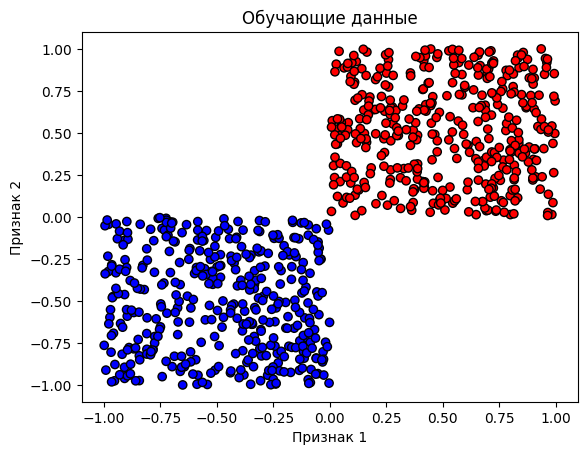

In [6]:
# Функция для визуализации данных
def plot_data(X, y):
    
    # Визуализация
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title('Обучающие данные')
    plt.show()

plot_data(X_train, y_train)
# plot_data(X_test, y_test)


##### Определение модели

In [8]:
class SingleNeuron(nn.Module):
    def __init__(self, input_dim):
        super(SingleNeuron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Один выходной нейрон
        self.activation = nn.Tanh()
        
    def forward(self, x):
        out = self.linear(x)
        out = self.activation(out)
        return out

In [9]:
# Инициализация модели
model = SingleNeuron(input_dim=2)

# Функция потерь (loss функция): MSE (Mean Squared Error)
criterion = nn.MSELoss()

# Оптимизатор
optimizer = optim.SGD(model.parameters(), lr=0.1)
# https://pytorch.org/docs/stable/generated/torch.optim.SGD.html


**Формулы:**

1. **Функция потерь MSE:**
   
   $$ \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2 $$

   где:
   - $ N $ — количество образцов,
   - $ \hat{y}_i $ — предсказанное значение,
   - $ y_i $ — истинное значение.

2. **Обновление весов (Стохастический градиентный спуск):**
   
   $$ \mathbf{w} := \mathbf{w} - \eta \frac{\partial \text{MSE}}{\partial \mathbf{w}} $$
   
   $$ b := b - \eta \frac{\partial \text{MSE}}{\partial b} $$

   где:
   - $ \eta $ — скорость обучения.


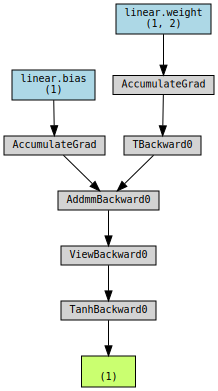

In [13]:
# Создаем визуализацию графа
from torchviz import make_dot
yhat = model(X_train[0])
dot = make_dot(yhat, params=dict(list(model.named_parameters())))
dot.render("single_neuron", format="png")

dot

In [14]:
loss_history = []

In [20]:
num_epochs = 10

# Для отслеживания потерь

for epoch in range(num_epochs):
    model.train()
    
    # Прямой проход
    outputs = model(X_train)
    loss = criterion(outputs, y_train)      # MSELoss
    
    # Обратный проход и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/10], Loss: 0.1941


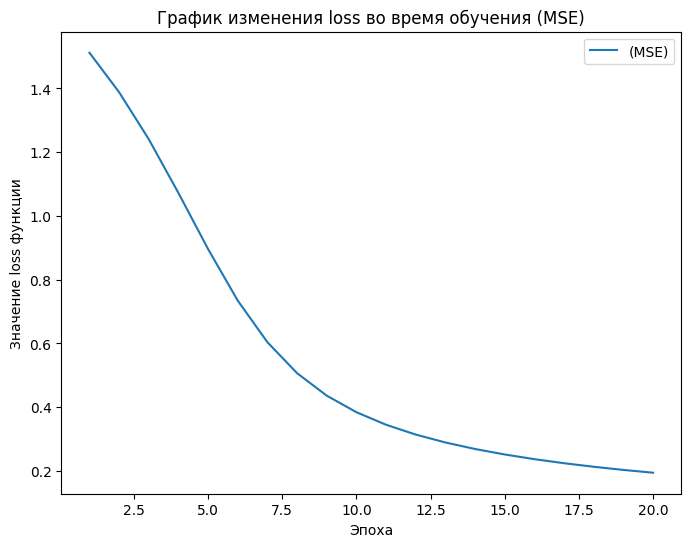

In [21]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(loss_history)+1), loss_history, label='(MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Значение loss функции')
plt.title('График изменения loss во время обучения (MSE)')
plt.legend()
plt.show()

In [22]:
# Переключение модели в режим оценки
model.eval()

with torch.no_grad():
    # Прогноз на тех же данных
    predicted = model(X_test)
    predicted_classes = torch.where(predicted > 0, 1, -1)
    # predicted_classes = (predicted >= 0.0).float()
    y_test_int = y_test.int()
    # Вычисление точности
    correct = (predicted_classes == y_test_int).sum().item()
    total = y_test.size(0)
    accuracy = correct / total * 100
    print(f'Точность модели на всех тестовых данных: {accuracy:.2f}%')

Точность модели на всех тестовых данных: 100.00%


In [30]:
# tanh = nn.Tanh()
# tanh(torch.tensor(6.0))

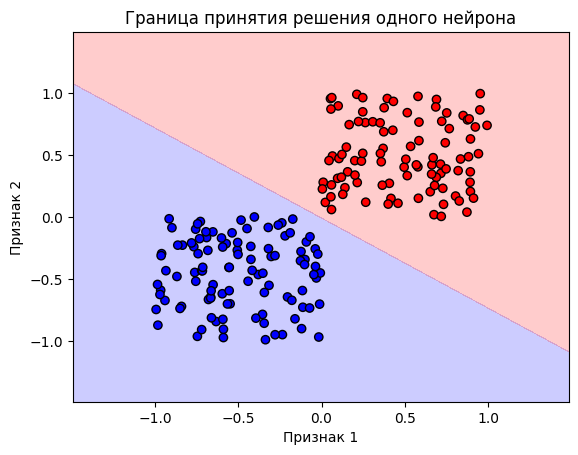

In [23]:
# Функция для визуализации данных и границы принятия решения
def plot_decision_boundary(model, X, y):
    # Определение диапазона для графика
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01  # Шаг сетки
    
    # Создание сетки
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Прогноз для каждой точки сетки
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape)
    
    # Визуализация
    plt.contourf(xx, yy, preds, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'red'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title('Граница принятия решения одного нейрона')
    plt.show()

# Преобразование тестовых данных для визуализации
X_test_np = X_test.numpy()
y_test_np = y_test.numpy().flatten()

plot_decision_boundary(model, X_test_np, y_test_np)


## Многослойный перцептрон (MLP)

Многослойный перцептрон является одной из базовых архитектур нейронных сетей, состоящей из нескольких слоёв нейронов.



__Архитектура MLP__

MLP обычно состоит из трёх типов слоёв:

1. **Входной слой**: Принимает исходные данные. Не выполняет вычислений, передаёт данные в скрытые слои.
2. **Скрытые слои**: Обрабатывают информацию, извлекая признаки. Могут быть одного или нескольких, выполняют вычисления и преобразования данных.
3. **Выходной слой**: Выдаёт результат сети. Формирует окончательный результат сети, часто использует специфическую активационную функцию в зависимости от задачи (регрессия, классификация и т.д.).

---

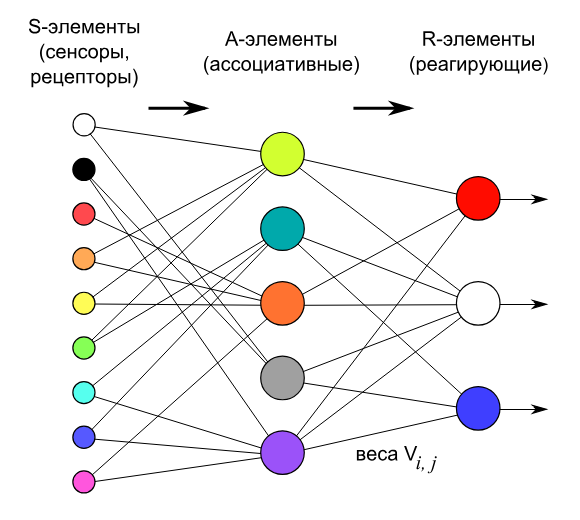

### Теорема Цыбенко

Пусть $\varphi$ любая непрерывная сигмоидная функция, например, $\varphi(\xi) = 1/(1 + e^{-\xi})$. 

Тогда, если дана любая непрерывная функция действительных переменных $f$ на $[0, 1]^n$ (или любое другое компактное подмножество $\mathbb{R}^n$) и $\varepsilon > 0$, 
то существуют векторы $\mathbf{w_1}, \mathbf{w_2}, \dots, \mathbf{w_N}, \mathbf{\alpha}$ и $\mathbf{\theta}$ и параметризованная функция $G(\mathbf{\cdot}, \mathbf{w}, \mathbf{\alpha}, \mathbf{\theta}): [0, 1]^n \to R$ такая, что для всех $\mathbf{x} \in [0,1]^n$ выполняется: 

$$\big|G(\mathbf{x}, \mathbf{w}, \mathbf{\alpha}, \mathbf{\theta}) - f(\mathbf{x})\big| < \varepsilon,$$

где: 

$$G(\mathbf{x}, \mathbf{w}, \mathbf{\alpha}, \mathbf{\theta}) = \sum_{i=1}^N \alpha_i \varphi(\mathbf{w}_i^T \mathbf{x} + \theta_i),$$


и $$ \mathbf{w}_i \in \mathbb{R}^n, \alpha_i, \theta_i \in \mathbb{R},$$ 

$$\mathbf{w} = (\mathbf{w}_1, \mathbf{w}_2, \dots, \mathbf{w}_N), \ \mathbf{\alpha} = (\alpha_1, \alpha_2, \dots, \alpha_N), \ \mathbf{\theta} = (\theta_1, \theta_2, \dots, \theta_N). $$


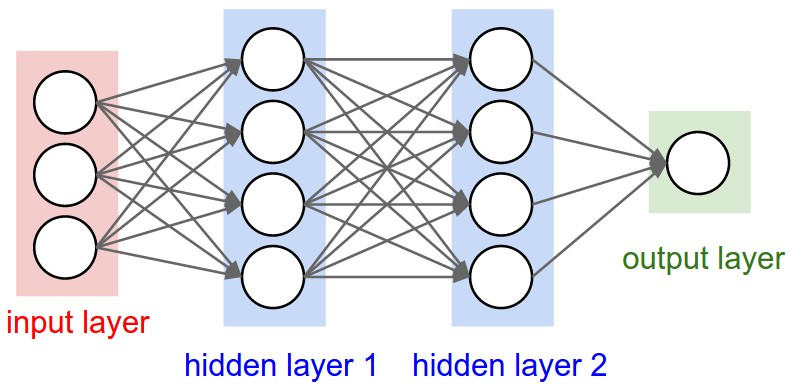

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np


### Определение архитектуры модели

In [26]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, num_classes=10):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)   # 784 -> 128        # 28*28
        self.relu = nn.ReLU()                           # 128
        self.fc2 = nn.Linear(hidden_size, num_classes)  # 128 -> 10  # logit [0.1, 700.0, -30.0]
        # self.softmax = nn.Softmax(dim=1)  # Для многоклассовой классификации  [0.1, 0.88, 0.02]

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        # out = self.softmax(out)
        return out



- Модель **SimpleMLP** представляет собой простую многослойную перцептронную сеть (MLP). Основные элементы:
    - `fc1 = nn.Linear(input_size, hidden_size)` — первый полносвязный слой (fully connected layer) с 784 входами и 128 скрытыми нейронами. Размер входного вектора 28×28=784, так как изображения из MNIST имеют размер 28×28 пикселей. Этот слой выполняет линейную трансформацию:
    $$
    z_1 = W_1 \cdot x + b_1
    $$
    где $ W_1 $ — матрица весов, $ x $ — входной вектор, $ b_1 $ — смещение (bias).
    
    - `self.relu = nn.ReLU()` — функция активации ReLU (Rectified Linear Unit), которая добавляет нелинейность в модель:
    $$
    a_1 = \text{ReLU}(z_1) = \max(0, z_1)
    $$
    
    - `fc2 = nn.Linear(hidden_size, num_classes)` — второй полносвязный слой, который преобразует 128 скрытых нейронов в 10 классов. Выход этого слоя передается через softmax:
    $$
    z_2 = W_2 \cdot a_1 + b_2
    $$
    
    - `self.softmax = nn.Softmax(dim=1)` — функция softmax, которая преобразует вектор выходов в вероятностное распределение по классам:
    $$
    \text{Softmax}(z_2)_i = \frac{e^{z_{2,i}}}{\sum_{j=1}^{C} e^{z_{2,j}}}
    $$
    где $ C = 10 $ — количество классов.


### Подготовка данных

In [27]:
# Трансформации данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка обучающего и тестового наборов данных
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Создание загрузчиков данных
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


   - Используются трансформации:
     - `transforms.ToTensor()` — преобразует изображение в тензор.
     - `transforms.Normalize((0.5,), (0.5,))` — нормализация данных: каждое значение пикселя приводится к диапазону $[-1, 1]$, что ускоряет обучение.


In [35]:
len(train_dataset)

60000

In [33]:
train_dataset[999][0].shape, train_dataset[999][1] 

(torch.Size([1, 28, 28]), 6)

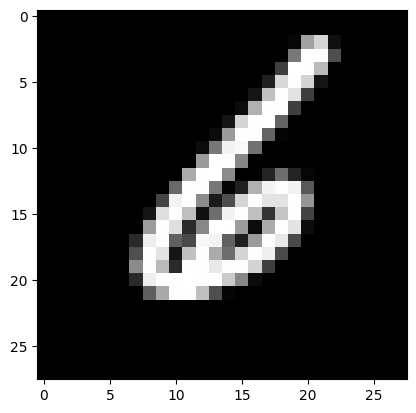

In [34]:
plt.imshow(train_dataset[999][0][0], cmap="gray")

### Инициализация модели, критерия и оптимизатора

In [37]:
# Проверка доступности CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Используемое устройство: {device}')

# Инициализация модели
model = SimpleMLP().to(device)

# Критерий потерь
criterion = nn.CrossEntropyLoss() # softmax + nllloss
# criterion_2 = nn.NLLLoss()      # 
# Оптимизатор
optimizer = optim.SGD(model.parameters(), lr=0.005)


Используемое устройство: cuda


### Кросс-энтропия (Cross Entropy)

#### Формула кросс-энтропии



**Кросс-энтропия** — это мера различия между двумя вероятностными распределениями. В контексте машинного обучения, особенно в задачах классификации, кросс-энтропия используется в качестве функции потерь для оценки качества предсказаний модели.


Для двух дискретных распределений вероятностей $ p $ (истинное распределение) и $ q $ (предсказанное распределение), кросс-энтропия определяется следующим образом:

$$
H(p, q) = -\sum_{i=1}^{C} p_i \log(q_i)
$$

где:
- $ C $ — количество классов.
- $ p_i $ — истинная вероятность класса $ i $ (в случае одноразрядного распределения $ p $ будет иметь значение 1 для истинного класса и 0 для остальных).
- $ q_i $ — предсказанная моделью вероятность класса $ i $.


#### Пример вычисления кросс-энтропии

Рассмотрим ситуацию, когда модель предсказывает вероятности для 3 классов как $ q = [0.2, 0.1, 0.7] $. Чтобы вычислить кросс-энтропию, необходимо знать истинное распределение $ p $. Предположим, что истинный класс — один из трех, и рассмотрим все возможные случаи.

1. **Истинный класс — первый класс ($ p = [1, 0, 0] $):**

$$
H(p, q) = - (1 \cdot \log(0.2) + 0 \cdot \log(0.1) + 0 \cdot \log(0.7)) = -\log(0.2)
$$

$$
H(p, q) \approx -(-1.6094) = 1.6094
$$

2. **Истинный класс — второй класс ($ p = [0, 1, 0] $):**

$$
H(p, q) = - (0 \cdot \log(0.2) + 1 \cdot \log(0.1) + 0 \cdot \log(0.7)) = -\log(0.1)
$$

$$
H(p, q) \approx -(-2.3026) = 2.3026
$$

3. **Истинный класс — третий класс ($ p = [0, 0, 1] $):**

$$
H(p, q) = - (0 \cdot \log(0.2) + 0 \cdot \log(0.1) + 1 \cdot \log(0.7)) = -\log(0.7)
$$

$$
H(p, q) \approx -(-0.3567) = 0.3567
$$


### Функция обучения модели

In [43]:
# Проверка доступности CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(f'Используемое устройство: {device}')

Используемое устройство: cuda


#### Проход данных по модели, пошагово

In [44]:
# Создание объекта - модели
model = SimpleMLP()

model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss(reduction='mean')

In [45]:
# Режим обучения модели
model.train()

# Получение одного батча изображений и меток
data_iter = iter(train_loader)
images, labels = next(data_iter)

In [46]:
print(f'Батч изображений, форма тензора: {images.shape}')
print(f'Батч меток изображений: {labels}')

Батч изображений, форма тензора: torch.Size([64, 1, 28, 28])
Батч меток изображений: tensor([3, 6, 3, 0, 1, 1, 8, 1, 9, 1, 2, 2, 7, 8, 6, 4, 2, 2, 4, 8, 9, 9, 7, 3,
        4, 0, 0, 7, 3, 9, 8, 1, 7, 5, 8, 0, 8, 7, 0, 5, 3, 8, 5, 3, 2, 6, 2, 5,
        5, 3, 0, 9, 5, 5, 8, 8, 5, 3, 3, 4, 6, 8, 2, 1])


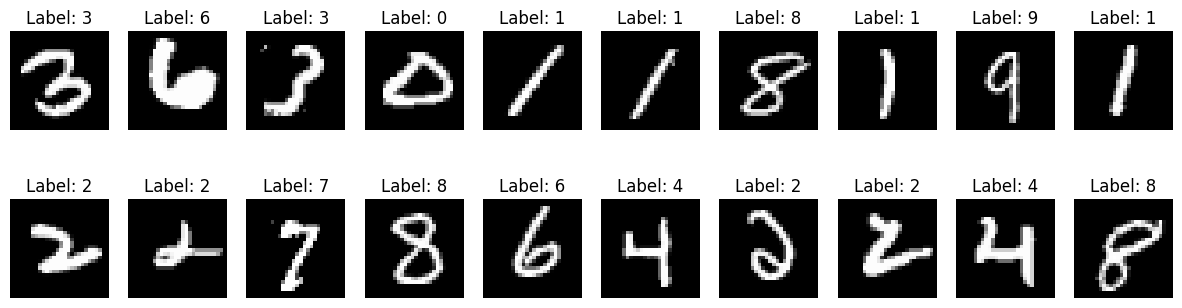

In [47]:
# Функция для преобразования тензора в изображение
def one_imshow(img):
    img = img / 2 + 0.5  # Денормализация изображения
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), cmap='gray')  # Транспонирование для правильного вывода
    plt.axis('off')

# Вывод батча изображений
plt.figure(figsize=(15, 4))
for i in range(20):
    plt.subplot(2, 10, i+1)
    one_imshow(images[i])
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')  # Скрытие осей
plt.show()

In [48]:
# Перенос на нужное устройство  
images = images.to(device)
labels = labels.to(device)
            #   reshape(-1, 28*28)
images = images.view(-1, 28*28)     # Разворачиваем изображения     # input_shape = 784
print(f'Батч изображений, форма тензора после разворачивания: {images.shape}')

Батч изображений, форма тензора после разворачивания: torch.Size([64, 784])


In [49]:
outputs = model(images)             # Проход изображение 
print(f'Батч выходов модели, форма тензора: {outputs.shape}')
print(f'Пример одного выхода: {outputs[0]}')

Батч выходов модели, форма тензора: torch.Size([64, 10])
Пример одного выхода: tensor([-0.1164, -0.4185, -0.3899,  0.1625,  0.1567,  0.0751,  0.2785, -0.3870,
        -0.1279, -0.2754], device='cuda:0', grad_fn=<SelectBackward0>)


In [52]:
sm = nn.Softmax(dim=0)
sm(torch.tensor([-0.1164, -0.4185, -0.3899,  0.1625,  0.1567,  0.0751,  0.2785, -0.3870, -0.1279, -0.2754]))

tensor([0.0958, 0.0708, 0.0729, 0.1267, 0.1259, 0.1161, 0.1422, 0.0731, 0.0947,
        0.0817])

In [53]:
# CrossEntropyLoss(logit, label) = NLLLoss(Softmax(logits), label)
#   logit             [-0.1164, -0.4185, -0.3899,  0.1625,  0.1567,  0.0751,  0.2785, -0.3870, -0.1279, -0.2754]
#   sofmax(logit)     [0.1, 0.05, 0.05, 0, 0.75, ... ], len = 10
#   label = 5 
#   one_hot_encoded = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 

loss = criterion(outputs, labels)
print(loss)

tensor(2.3321, device='cuda:0', grad_fn=<NllLossBackward0>)


In [54]:
print(model.fc1.weight.grad)
print(model.fc2.weight.grad)

None
None


In [55]:
optimizer.zero_grad()   # обнуляем градиенты

In [56]:
loss.backward()         # проброс градиентов

In [57]:
print(model.fc1.weight.grad, model.fc1.weight.grad.shape)
print(model.fc2.weight.grad, model.fc2.weight.grad.shape)

tensor([[-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        ...,
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0') torch.Size([128, 784])
tensor([[-2.6168e-02, -4.7894e-04, -1.3139e-02,  ...,  1.4492e-03,
          1.1990e-03,  0.0000e+00],
        [ 3.5570e-03,  6.6333e-05,  7.8414e-03,  ...,  1.6007e-03,
         -2.4538e-02,  0.0000e+00],
        [ 3.0635e-03,  5.6898e-05, -1.4492e-02,  ..., -1.0272e-03,
         -1.2788e-02,  0.0000e+00],
        ...,
        [ 2.4145e-03,  3.7082e-05,  1.2548e-02,  ...,  1.2972e-03,
         -3.0181e-02,  0.0000e+00],
        [ 2.7999e-03,  4.3140e-05,  6.2805e-03,  ..., -4.8323e-03,
         -6.1362e-02,  0.00

In [58]:
optimizer.step()

In [59]:
outputs.data.shape

torch.Size([64, 10])

In [60]:
_, predicted = torch.max(outputs.data, 1)
print(f'Предсказанные моделью классы: {predicted[:10]}')
print(f'Истинные классы:              {labels[:10]}')

Предсказанные моделью классы: tensor([6, 3, 0, 3, 3, 3, 3, 3, 4, 3], device='cuda:0')
Истинные классы:              tensor([3, 6, 3, 0, 1, 1, 8, 1, 9, 1], device='cuda:0')


In [61]:
total_train = labels.size(0)
correct_train = (predicted == labels).sum().item()

In [62]:
train_accuracy = 100 * correct_train / total_train
print(f'Точность модели: {train_accuracy}%')

Точность модели: 7.8125%


In [64]:
model.eval()

with torch.no_grad():
    
    images = images.to(device)
    labels = labels.to(device)
        
    images = images.view(-1, 28*28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total_test = labels.size(0)
    correct_test = (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test

print(f'Точность модели: {test_accuracy}%')

Точность модели: 15.625%


### Обучение модели

In [65]:
# Проверка доступности CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Используемое устройство: {device}')

# Инициализация модели
model = SimpleMLP().to(device)

# Критерий потерь
criterion = nn.CrossEntropyLoss() # softmax + nllloss
# criterion_2 = nn.NLLLoss()      # 
# Оптимизатор
optimizer = optim.SGD(model.parameters(), lr=0.005)


Используемое устройство: cuda


In [66]:
# Списки для хранения значений потерь и точности
train_losses = []
train_accuracies = []
test_accuracies = []

In [57]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  # Перевод модели в режим обучения
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        
        # Перенос данных на устройство
        images = images.to(device)
        labels = labels.to(device)
        
        # Разворачивание изображений в векторы
        images = images.view(-1, 28*28)     # reshape(-1, 28*28)
        
        # Прямой проход
        outputs = model(images)
        loss = criterion(outputs, labels)
                                # [0, 0, 1] 
        # Обратный проход и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Вычисление точности на текущем батче
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if (batch_idx+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    # Средняя потеря за эпоху
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    
    # Точность на обучающем наборе за эпоху
    train_accuracy = 100 * correct / total
    print(f'Эпоха [{epoch+1}/{num_epochs}] Завершена. Средний loss: {avg_loss:.4f}, Точность: {train_accuracy:.2f}%')
    train_accuracies.append(train_accuracy)
    
    # Оценка модели на тестовом наборе после каждой эпохи
    model.eval()  # Перевод модели в режим оценки
    with torch.no_grad():
        correct_test = 0
        total_test = 0
        for images, labels in test_loader:

            # Перенос данных на устройство
            images = images.to(device)
            labels = labels.to(device)

            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)
        print(f'Точность модели на тестовых данных после эпохи {epoch+1}: {test_accuracy:.2f}%\n')


Epoch [1/5], Step [100/938], Loss: 0.4973
Epoch [1/5], Step [200/938], Loss: 0.3964
Epoch [1/5], Step [300/938], Loss: 0.2420
Epoch [1/5], Step [400/938], Loss: 0.2315
Epoch [1/5], Step [500/938], Loss: 0.2908
Epoch [1/5], Step [600/938], Loss: 0.2982
Epoch [1/5], Step [700/938], Loss: 0.6701
Epoch [1/5], Step [800/938], Loss: 0.1692
Epoch [1/5], Step [900/938], Loss: 0.2295
Эпоха [1/5] Завершена. Средний loss: 0.3491, Точность: 89.46%
Точность модели на тестовых данных после эпохи 1: 93.58%

Epoch [2/5], Step [100/938], Loss: 0.1340
Epoch [2/5], Step [200/938], Loss: 0.2892
Epoch [2/5], Step [300/938], Loss: 0.1177
Epoch [2/5], Step [400/938], Loss: 0.1556
Epoch [2/5], Step [500/938], Loss: 0.0837
Epoch [2/5], Step [600/938], Loss: 0.2192
Epoch [2/5], Step [700/938], Loss: 0.1920
Epoch [2/5], Step [800/938], Loss: 0.1641
Epoch [2/5], Step [900/938], Loss: 0.3999
Эпоха [2/5] Завершена. Средний loss: 0.2123, Точность: 93.71%
Точность модели на тестовых данных после эпохи 2: 94.70%

Epoc

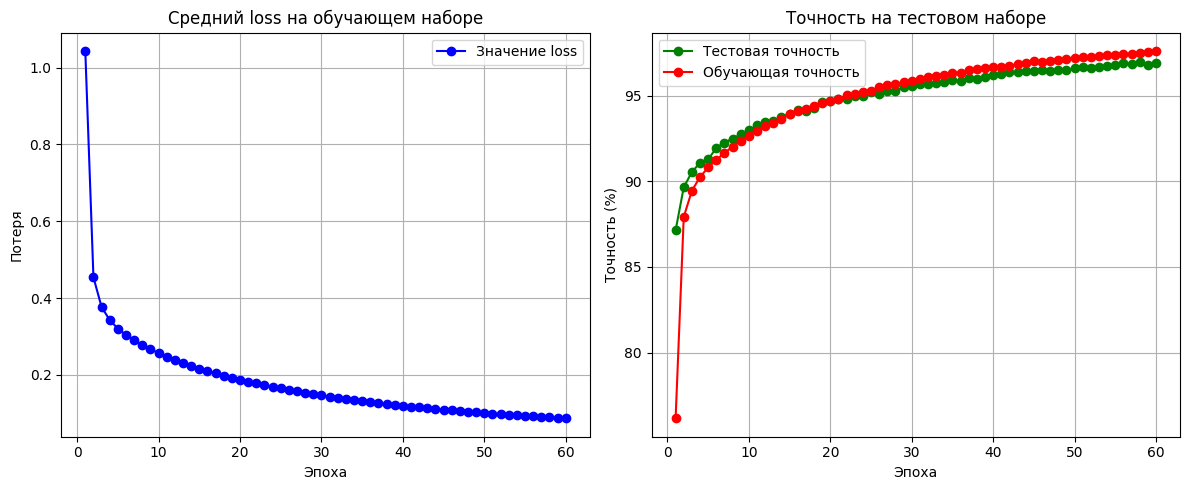

In [26]:
### Визуализация результатов

num_epochs = len(train_losses)
# Построение графика потерь на обучающем наборе
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o', color='b', label='Значение loss')
plt.title('Средний loss на обучающем наборе')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.grid(True)
plt.legend()

# Построение графика точности на тестовом наборе
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), test_accuracies, marker='o', color='g', label='Тестовая точность')
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o', color='r', label='Обучающая точность')
plt.title('Точность на тестовом наборе')
plt.xlabel('Эпоха')
plt.ylabel('Точность (%)')
plt.grid(True)

# Добавление легенды
plt.legend()

plt.tight_layout()
plt.show()

`https://playground.tensorflow.org/`